# Monthly Climatology of absolute LAI (for illustration)

In [102]:
import matplotlib
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from lib_ploting import plotMap_withBorders, savefigure, labels

In [116]:
# load the data
dir_root = "/home/julie_andre/PycharmProjects/Damocles_Project3/data/data_raw/" # depending on your computer
dir_save_nc = "/home/julie_andre/PycharmProjects/Damocles_Project3/generated_data/" # depending on your computer
dir_save_fig = "/home/julie_andre/PycharmProjects/Damocles_Project3/plots/"

nc_name =  "GLOBMAP_LAI.monthly.1982-2020_europe_025deg.nc"
nc_path = dir_root + nc_name

var_name = "GLOBMAP_LAI"
data = xr.open_dataset(nc_path)[var_name]
print(data)

<xarray.DataArray 'GLOBMAP_LAI' (time: 468, latitude: 200, longitude: 220)>
[20592000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2020-12-31
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 44.38 44.62 44.88
  * latitude   (latitude) float64 74.88 74.62 74.38 74.12 ... 25.62 25.38 25.12
Attributes:
    long_name:  GLOBMAP_LAI
    units:      %


## Select three interesting pixel and plot their location

The figure has been saved


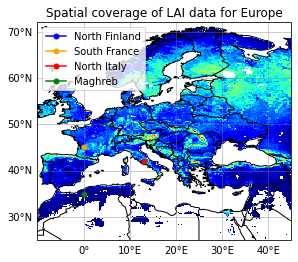

In [7]:
map_LAI_extend = data[0].copy()
plotMap_withBorders(map_LAI_extend, add_colorbar=False, plot_gridlines_labels=True, label = "LAI data coverage")
lon, lat = 25, 68
plt.plot(lon, lat, color= 'b', marker='o', markersize=5, label = "North Finland")

lon, lat = 0, 45
plt.plot(lon, lat, color= 'Orange', marker='o', markersize=5, label = "South France")

lon, lat = 13, 42
plt.plot(lon, lat, color= 'r', marker='o', markersize=5, label = "North Italy")

lon, lat = 0, 35
plt.plot(lon, lat, color= 'g', marker='o', markersize=5, label = "Maghreb")

plt.legend()
plt.title("Spatial coverage of LAI data for Europe")

fig_path = dir_save_fig + "LAI_loc_3pixels.png"
savefigure(fig_path)

Check the land cover.

In [3]:
nc_path = "/home/julie_andre/PycharmProjects/Damocles_Project3/data/data_preprocessed/regridded_LU_2018.nc"
land_cover = xr.open_dataset(nc_path)
print(land_cover)

<xarray.Dataset>
Dimensions:                     (lat: 200, lon: 220)
Coordinates:
  * lat                         (lat) float64 25.12 25.38 25.62 ... 74.62 74.88
  * lon                         (lon) float64 -9.875 -9.625 ... 44.62 44.88
Data variables: (12/19)
    majority_class_1            (lat, lon) float64 ...
    majority_class_2            (lat, lon) float64 ...
    majority_class_3            (lat, lon) float64 ...
    Tree_Broadleaf_Evergreen    (lat, lon) float64 ...
    Tree_Broadleaf_Deciduous    (lat, lon) float64 ...
    Tree_Needleleaf_Evergreen   (lat, lon) float64 ...
    ...                          ...
    Bare_soil                   (lat, lon) float64 ...
    Water                       (lat, lon) float64 ...
    Snow_Ice                    (lat, lon) float64 ...
    Urban                       (lat, lon) float64 ...
    NoData                      (lat, lon) float64 ...
    change_count                (lat, lon) float64 ...


## Do the monthly LAI climatology for those locations

1.6045507192611694
2.7015652656555176
4.760073661804199
0.4845152497291565
The figure has been saved


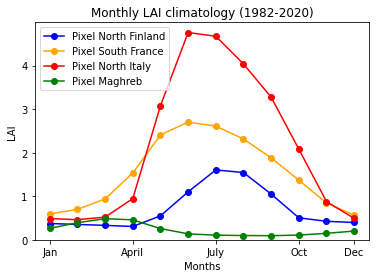

In [12]:
lon_pixel = [25, 0, 13, 0]
lat_pixel = [68, 45, 42, 35]
pixel_names = ["North Finland", "South France", "North Italy", "Maghreb"]
colors = ['b', 'Orange', 'r', "g"]


for lon, lat, pixel_name, color in zip(lon_pixel, lat_pixel, pixel_names, colors):
    data_pixel = data.sel(latitude = lat, longitude = lon, method="nearest")

    data_climatology = data_pixel.groupby("time.month").mean("time")
    print(float(data_climatology.max()))
    plt.plot(np.arange(1, 12+1), data_climatology, marker = "o", color = color, label = f"Pixel {pixel_name}")

plt.legend()
plt.xticks([1, 4, 7, 10, 12], ['Jan', 'April', 'July', 'Oct', 'Dec'])
plt.ylim(0)
labels('Months', "LAI" , f'Monthly LAI climatology (1982-2020)')

fig_path = dir_save_fig + "LAI_climatology_4pixels.png"
savefigure(fig_path)


The figure has been saved


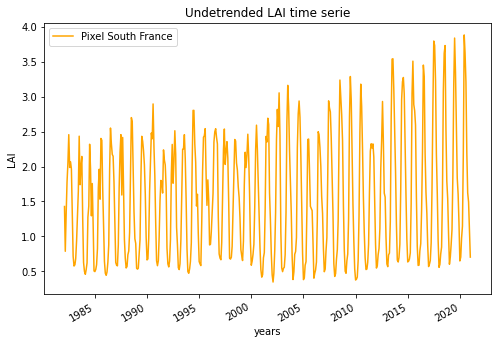

In [29]:
# LAI for France Landes
lon, lat = 0, 45
data_pixel = data.sel(latitude = lat, longitude = lon, method="nearest")
plt.figure(figsize=(8, 5))
data_pixel.plot(color='Orange', label= "Pixel South France")
plt.legend()
labels("years", "LAI",  "Undetrended LAI time serie")


fig_path = dir_save_fig + "LAI_france_pixel_time_serie.png"
savefigure(fig_path)

Here we see a strong trend in detrend LAI

## Maps of peak LAI

We may think of removing from the study the points where LAI peak is very low.

In [52]:
def peak_LAI_value(data_lai:xr.DataArray) -> xr.DataArray:
    """ compute the peak monthly LAI value pointwise """
    axis_time = data_lai.get_axis_num(dim='time')
    data_climatology = data_lai.groupby("time.month").mean("time")
    data_monthly_max = data_climatology.max(axis=axis_time)
    return data_monthly_max

peak_monthly_value_LAI = peak_LAI_value(data)


The figure has been saved


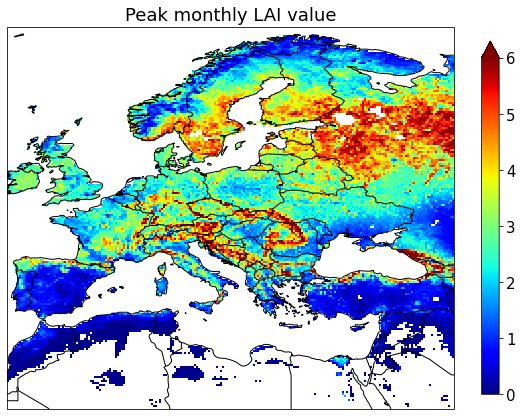

In [105]:
plt.figure(figsize = (10, 10))
plotMap_withBorders(peak_monthly_value_LAI, title="Peak monthly LAI value", vmin=0, vmax=6)
savefigure(dir_save_fig + "peak_monthly_LAI_map.png")

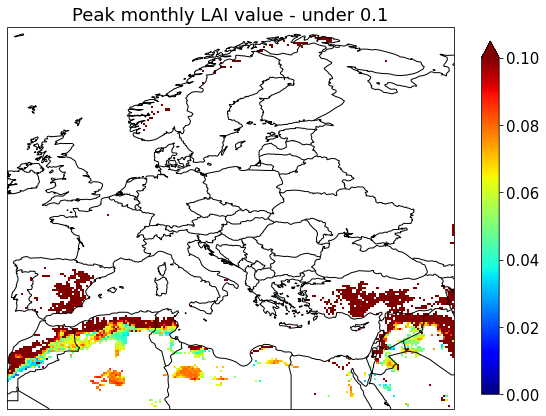

The figure has been saved


<Figure size 432x288 with 0 Axes>

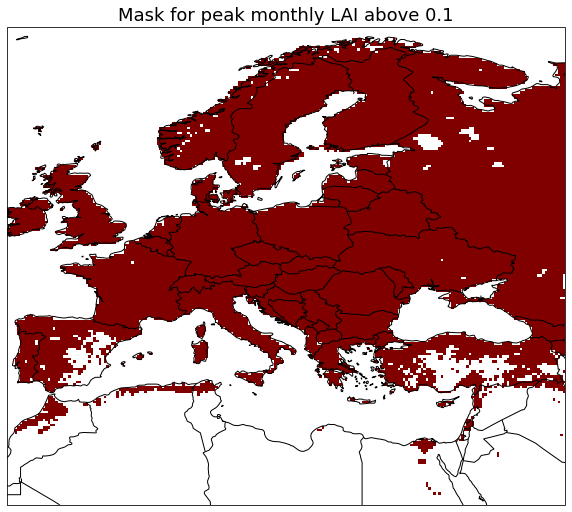

The figure has been saved


<Figure size 432x288 with 0 Axes>

In [118]:
threshold_LAI = 0.1
plt.figure(figsize = (10, 10))
plotMap_withBorders(peak_monthly_value_LAI.where(peak_monthly_value_LAI<0.5), title=f"Peak monthly LAI value - under {threshold_LAI}", vmin=0, vmax=threshold_LAI), plt.show()
savefigure(dir_save_fig + "peak_monthly_LAI_pixel_removed.png")

plt.figure(figsize = (10, 10))
mask_LAI_above_threshold = 1+0*peak_monthly_value_LAI.where(peak_monthly_value_LAI>0.5)
plotMap_withBorders(mask_LAI_above_threshold, title=f"Mask for peak monthly LAI above {threshold_LAI}", vmin=threshold_LAI, add_colorbar=False), plt.show()
savefigure(dir_save_fig + "peak_monthly_LAI_pixel_mask.png")

# saving the mask
mask_LAI_above_threshold.to_netcdf(dir_save_nc + f"mask_LAI_above_{threshold_LAI}_threshold.nc")

Let's look at the distribution of peak LAI.

23553 nans removed in the new columns.
The figure has been saved


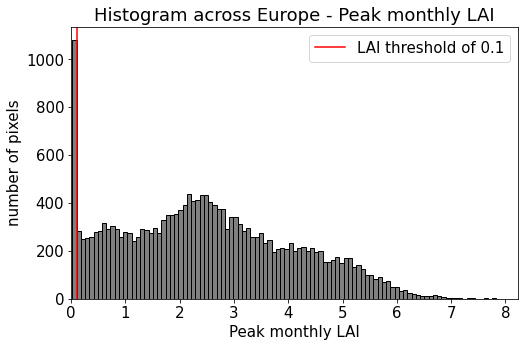

In [104]:
peak_monthly_value_LAI_flat_with_nan = peak_monthly_value_LAI.values.flatten()

def removeNans(data1D: np.ndarray, printing: str = False) -> np.ndarray:
    """ returns the elements different of nan from a 1D other
    it is quicker for a numpy other than a xarray, so perform it on .values."""
    # remove potential nans
    mask_nan = np.isnan(data1D)
    data1D_no_nans = data1D[~mask_nan]  # keeping only the non na columns.
    if printing:
        print(f'{np.count_nonzero(mask_nan)} nans removed in the new columns.')
    return data1D_no_nans

peak_monthly_value_LAI_flat = removeNans(peak_monthly_value_LAI_flat_with_nan, printing=True)

# plot its distribution
plt.figure(figsize=(8,5))
matplotlib.rcParams.update({'font.size': 15})
plt.hist(peak_monthly_value_LAI_flat, density=False, bins=100, color='grey', edgecolor="black" )
plt.xlim(0)
labels("Peak monthly LAI", "number of pixels", "Histogram across Europe - Peak monthly LAI")

plt.axvline(x = threshold_LAI, color='r', label= f'LAI threshold of {threshold_LAI}')
plt.legend()
savefigure(dir_save_fig + "peak_monthly_LAI_histogram.png")

Thus if we take only the pixel where the peak monthly LAI is above 1, we'l remove about 20% of the pixel.

## Maps of the month of peak LAI

Objectives: see the latitude gradient, study the growing season.

In [119]:
# TO DO

## Check the LAI detrended.

Now we use the data from seasonal LAI.

In [30]:
# load data
dir_root = "/home/julie_andre/PycharmProjects/Damocles_Project3/data/data_preprocessed/"# depending on your computer

var_name_path = "lai"
var_name = "GLOBMAP_LAI"
nc_path = f"{dir_root}aggregated_{var_name_path}.nc"
data = xr.open_dataset(nc_path)[var_name]
print(data)

<xarray.DataArray 'GLOBMAP_LAI' (time: 157, latitude: 200, longitude: 220)>
[6908000 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1981-12-01 1982-03-01 ... 2020-12-01
  * longitude  (longitude) float64 -9.875 -9.625 -9.375 ... 44.38 44.62 44.88
  * latitude   (latitude) float64 74.88 74.62 74.38 74.12 ... 25.62 25.38 25.12


<xarray.DataArray 'GLOBMAP_LAI' (time: 39)>
array([-1.104474, -1.964138, -3.704678, -1.40017 , -0.160689, -1.446461,
        0.102818, -0.418215,  0.797977, -2.853032, -1.879466, -1.190432,
       -0.60323 , -1.426223,  0.100791, -1.817508, -2.731138, -1.904162,
       -2.503224,  0.26129 ,  2.090945,  1.10474 ,  1.681507, -4.889609,
       -2.499517,  0.434378,  2.548996,  1.095001,  0.644092, -2.318744,
       -0.764098,  5.005017,  3.507081,  2.474982,  1.518998,  6.010294,
        3.634345,  3.178194,  1.387762])
Coordinates:
  * time       (time) datetime64[ns] 1982-06-01 1983-06-01 ... 2020-06-01
    longitude  float64 0.125
    latitude   float64 45.12
The figure has been saved


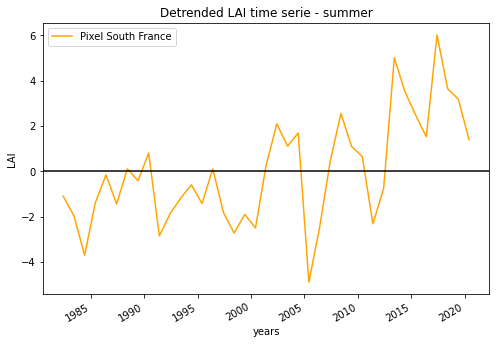

In [41]:
# LAI for France Landes
lon, lat = 0, 45
data_pixel = data.sel(latitude = lat, longitude = lon, method="nearest").groupby("time.season")['JJA']
print(data_pixel)

plt.figure(figsize=(8, 5))
data_pixel.plot(color='Orange', label= "Pixel South France")
plt.legend()
plt.axhline(y=0, color='k')
labels("years", "LAI",  "Detrended LAI time serie - summer")


fig_path = dir_save_fig + "LAI_france_pixel_time_serie_detrended_summer.png"
savefigure(fig_path)